In [12]:
from typing import TypedDict

In [13]:
class PortfolioState(TypedDict):
    amount_usd: float
    total_usd: float
    total_inr: float

In [14]:
def cal_tot(state: PortfolioState) -> PortfolioState:
    state['total_usd'] = state['amount_usd'] * 1.08
    return state

def convert_to_inr(state: PortfolioState) -> PortfolioState:
    state['total_inr'] = state['total_usd'] * 90
    return state

In [15]:
from langgraph.graph import StateGraph, START, END

builder = StateGraph(PortfolioState)

builder.add_node("cal_tot_node", cal_tot)
builder.add_node("convert_to_inr_node", convert_to_inr)

builder.add_edge(START, "cal_tot_node")
builder.add_edge("cal_tot_node", "convert_to_inr_node")
builder.add_edge("convert_to_inr_node", END)

graph = builder.compile()

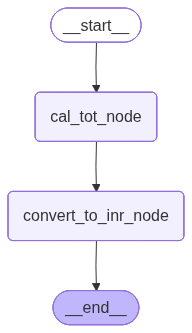

In [16]:

from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [17]:

graph.invoke({"amount_usd": 100000})

{'amount_usd': 100000, 'total_usd': 108000.0, 'total_inr': 9720000.0}